# Building my first Deep Neural Network 

Our basic aim is to predict customer churn for a certain bank i.e. which customer is going to leave this bank service. Dataset is small(for learning purpose) and contains 10000 rows with 14 columns.The dataset can be observed from the csv file in the directory.

## Step 1: Data Pre-Processing

In [67]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from IPython.display import HTML, display
import tabulate

In [68]:
dataset = pd.read_csv('./Churn_Modelling.csv')
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [69]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
RowNumber          10000 non-null int64
CustomerId         10000 non-null int64
Surname            10000 non-null object
CreditScore        10000 non-null int64
Geography          10000 non-null object
Gender             10000 non-null object
Age                10000 non-null int64
Tenure             10000 non-null int64
Balance            10000 non-null float64
NumOfProducts      10000 non-null int64
HasCrCard          10000 non-null int64
IsActiveMember     10000 non-null int64
EstimatedSalary    10000 non-null float64
Exited             10000 non-null int64
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [70]:
cat_variables = [i for i in dataset.columns]
cat_variables.remove("Exited")
cat_variables.remove("RowNumber")
cat_variables.remove("CustomerId")
cat_variables.remove("Surname")

Label = "Exited"

cat_variables

['CreditScore',
 'Geography',
 'Gender',
 'Age',
 'Tenure',
 'Balance',
 'NumOfProducts',
 'HasCrCard',
 'IsActiveMember',
 'EstimatedSalary']

**Plotting box plot to anlayse the distribution of different numerical attributes**

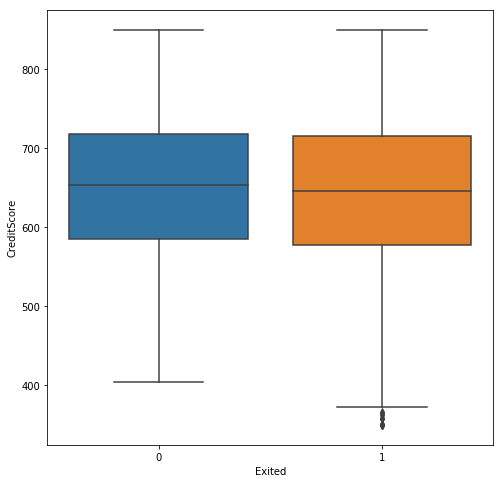

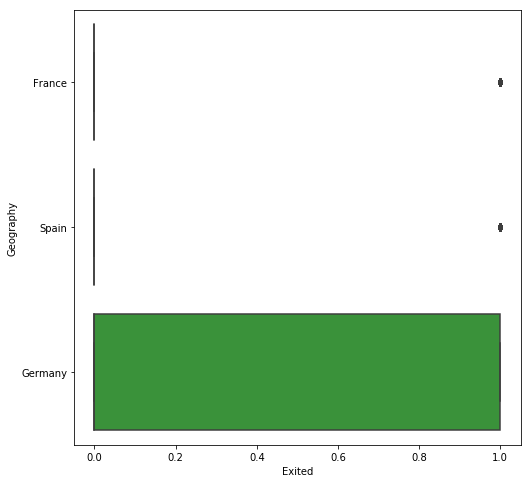

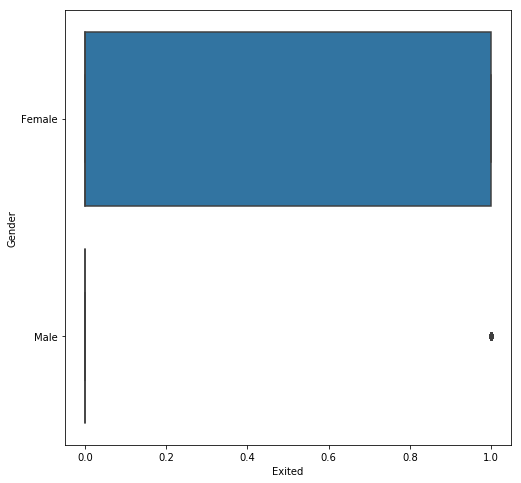

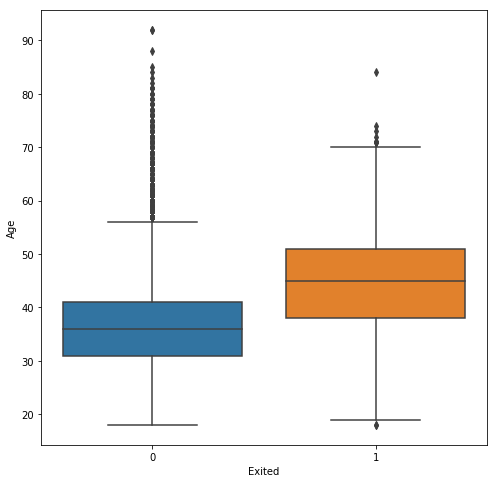

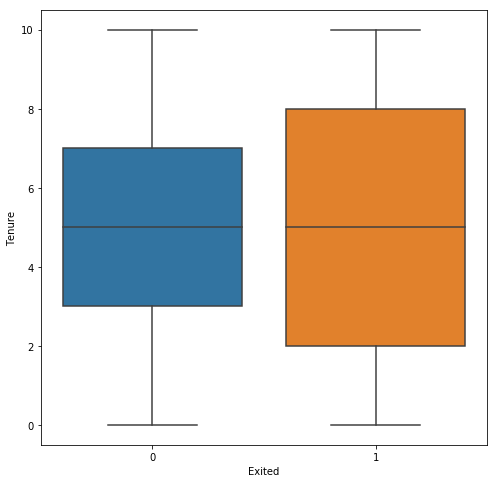

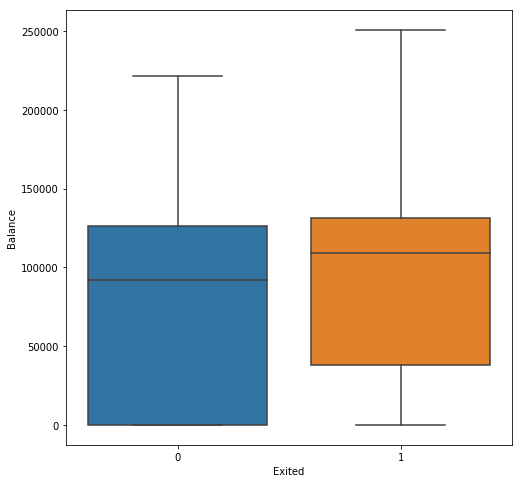

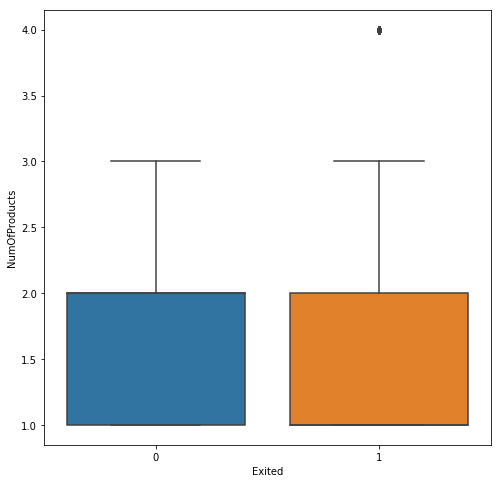

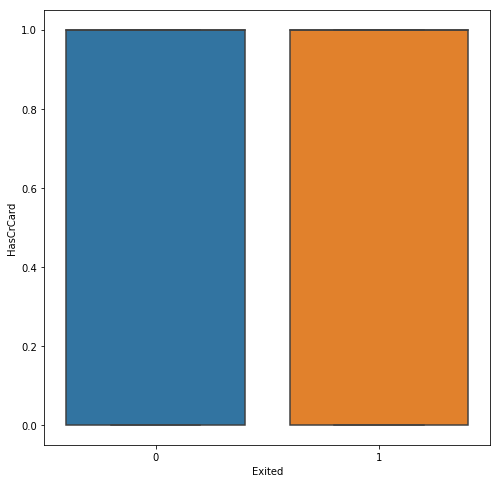

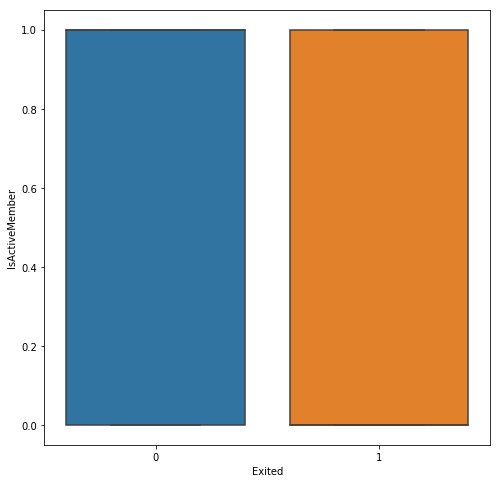

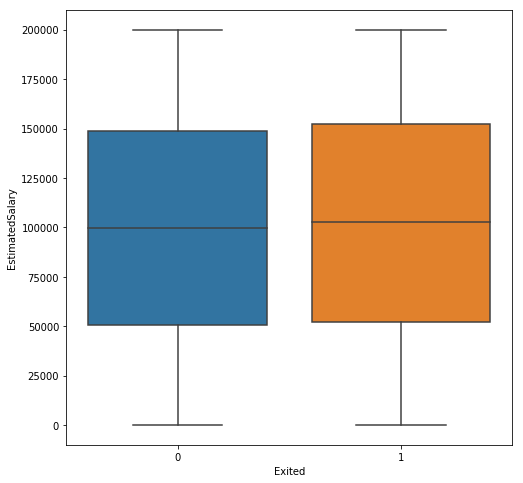

In [71]:
for i in cat_variables:
    plt.figure(figsize=(8,8))
    sns.boxplot(x=Label,y=i,data=dataset)
    plt.show()

**Dividing the dataset to training and test variables**

In [72]:
X=dataset.iloc[:,3:13]
y=dataset.iloc[:,13]

**LabelEncoder automatically converts into labeled classes from 0 to classes-1**

In [73]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder 
## lebelencoder fro geography and gender
labelencoder_X1=LabelEncoder()
labelencoder_X2=LabelEncoder()
X.iloc[:, 1]=labelencoder_X1.fit_transform(X.iloc[:, 1])
X.iloc[:, 2]=labelencoder_X2.fit_transform(X.iloc[:, 2])
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,0,0,42,2,0.00,1,1,1,101348.88
1,608,2,0,41,1,83807.86,1,0,1,112542.58
2,502,0,0,42,8,159660.80,3,1,0,113931.57
3,699,0,0,39,1,0.00,2,0,0,93826.63
4,850,2,0,43,2,125510.82,1,1,1,79084.10


The problem is that with label encoding, the categories now have natural ordered relationships. The computer does this because it’s programmed to treat higher numbers as higher numbers; it will naturally give the higher numbers higher weights. 
Label encoding has introduced new problem in our data. LabelEncoder has replaced France with 0, Germany 1 and Spain 2 but Germany is not higher than France and France is not smaller than Spain so we need to create a dummy variable for Country. **Hence OneHotEncoder is used after LabelEncoding**

In [74]:
onehotencoder = OneHotEncoder(categorical_features = [1])
X = onehotencoder.fit_transform(X).toarray()
X = X[:, 1:]

## used for displaying arrays
dd=X[:5,:]
display(HTML(tabulate.tabulate(dd, tablefmt='html')))

/home/sakshi/.local/lib/python3.6/site-packages/sklearn/preprocessing/_encoders.py:371: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
/home/sakshi/.local/lib/python3.6/site-packages/sklearn/preprocessing/_encoders.py:392: DeprecationWarning: The 'categorical_features' keyword is deprecated in version 0.20 and will be removed in 0.22. You can use the ColumnTransformer instead.
  "use the ColumnTransformer instead.", DeprecationWarning)


0,0,619,0,42,2,0,1,1,1,101349
0,1,608,0,41,1,83807.9,1,0,1,112543
0,0,502,0,42,8,159661,3,1,0,113932
0,0,699,0,39,1,0,2,0,0,93826.6
0,1,850,0,43,2,125511,1,1,1,79084.1


## Step 2 : Splitting the data into 80:20 Train:Test for predictions

In [75]:
from sklearn.model_selection import train_test_split    ##training our data
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2)


In [34]:
from sklearn.preprocessing import StandardScaler       ##scaling our data
sc = StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.fit_transform(X_test)

dd=X_train[:5,:]
display(HTML(tabulate.tabulate(dd, tablefmt='html')))


-0.576388,-0.576003,0.296173,0.905448,0.857417,1.03498,-1.2286,0.810966,0.644731,-1.02558,-1.33305
1.73494,-0.576003,-0.550231,-1.10443,-0.378996,1.03498,0.868591,-0.909917,0.644731,0.975061,1.60741
-0.576388,-0.576003,-0.312825,0.905448,-1.04476,1.03498,-1.2286,0.810966,0.644731,0.975061,1.72983
1.73494,-0.576003,-1.32438,-1.10443,-0.188779,-0.696625,0.291452,-0.909917,0.644731,0.975061,0.501624
-0.576388,1.7361,-0.405723,-1.10443,-0.188779,-0.350304,-1.2286,0.810966,0.644731,-1.02558,0.442447


## Step 3: Building our Deep Neural Network

In [45]:
##start making neural network
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers.core import Dense
## (i) number of hidden layers equals one;
## (ii) the number of neurons in that layer is the mean of the neurons in the input and output layers. 

##initializing the neural network
classifier=Sequential()

# Adding the input layer and the first hidden layer
classifier.add(Dense(output_dim = 6, init = 'uniform', activation = 'relu', input_dim = 11))

# Adding the second hidden layer
classifier.add(Dense(output_dim = 6, init = 'uniform', activation = 'relu'))

# Adding the output layer
classifier.add(Dense(output_dim = 1, init = 'uniform', activation = 'sigmoid'))


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_dim=11, units=6, kernel_initializer="uniform")`
  del sys.path[0]
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=6, kernel_initializer="uniform")`
  app.launch_new_instance()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=1, kernel_initializer="uniform")`


## Step 4: Fitting model and calculating Accuracy

In [46]:
##compiling our nerual network
classifier.compile(optimizer='Adam',loss='binary_crossentropy',metrics=['accuracy'])

In [47]:
# Fitting our model 
classifier.fit(X_train, y_train, batch_size = 10, nb_epoch = 100)

Instructions for updating:
Use tf.cast instead.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


Epoch 1/100
8000/8000 [==============================] - 1s 158us/step - loss: 0.4843 - acc: 0.7977
Epoch 2/100
8000/8000 [==============================] - 1s 119us/step - loss: 0.4191 - acc: 0.8227
Epoch 3/100
8000/8000 [==============================] - 1s 116us/step - loss: 0.4124 - acc: 0.8282
Epoch 4/100
8000/8000 [==============================] - 1s 116us/step - loss: 0.4086 - acc: 0.8294
Epoch 5/100
8000/8000 [==============================] - 1s 116us/step - loss: 0.4058 - acc: 0.8319
Epoch 6/100
8000/8000 [==============================] - 1s 114us/step - loss: 0.4037 - acc: 0.8335
Epoch 7/100
8000/8000 [==============================] - 1s 109us/step - loss: 0.4027 - acc: 0.8330
Epoch 8/100
8000/8000 [==============================] - 1s 111us/step - loss: 0.4007 - acc: 0.8357
Epoch 9/100
8000/8000 [==============================] - 1s 117us/step - loss: 0.3992 - acc: 0.8336
Epoch 10/100
8000/8000 [==============================] - 1s 117us/step - loss: 0.3978 - acc: 0.8357

8000/8000 [==============================] - 1s 115us/step - loss: 0.3392 - acc: 0.8625
Epoch 83/100
8000/8000 [==============================] - 1s 118us/step - loss: 0.3393 - acc: 0.8632
Epoch 84/100
8000/8000 [==============================] - 1s 117us/step - loss: 0.3394 - acc: 0.8631
Epoch 85/100
8000/8000 [==============================] - 1s 117us/step - loss: 0.3385 - acc: 0.8616
Epoch 86/100
8000/8000 [==============================] - 1s 121us/step - loss: 0.3391 - acc: 0.8619
Epoch 87/100
8000/8000 [==============================] - 1s 135us/step - loss: 0.3385 - acc: 0.8641
Epoch 88/100
8000/8000 [==============================] - 1s 114us/step - loss: 0.3387 - acc: 0.8611
Epoch 89/100
8000/8000 [==============================] - 1s 120us/step - loss: 0.3391 - acc: 0.8621
Epoch 90/100
8000/8000 [==============================] - 1s 118us/step - loss: 0.3383 - acc: 0.8637
Epoch 91/100
8000/8000 [==============================] - 1s 113us/step - loss: 0.3387 - acc: 0.8625
Epo

In [52]:
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)
#converting into a binary matrix of those who can leave the bank

array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

In [54]:
# Creating the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[1531,   60],
       [ 205,  204]])

In [55]:
accuracy = (1531 + 204)/(1531 + 204 + 60 + 205)
accuracy

0.8675